<h1> NFL Weekly Data 2022 </h1>

<h5> The purpose of this notebook is to track the progress of yards starting week 1 and ending week 18 of the 2022 NFL regular season. The following positions are in consideration: wide receiver, quarter back, and running back. A line chart was created for each position to keep a runing total of yards. </h5>

In [ ]:
##### !pip install nfl_data_py

In [2]:
import pandas as pd
import nfl_data_py as nfl
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

<p> Take the weekly data from 2022 and create three seperate dataframes based on one of the following positions: quarter back (QB), running back (RB), and wide reciever (WR). We only want to access the data from the regular season.</p> 

In [3]:
weekly_data = nfl.import_weekly_data([2022])
QB_weekly_data = weekly_data[(weekly_data['position'] == 'QB') & (weekly_data['season_type']=='REG')]
WR_weekly_data = weekly_data[(weekly_data['position']=='WR') & (weekly_data['season_type']=='REG')]
RB_weekly_data = weekly_data[(weekly_data['position']=='RB') & (weekly_data['season_type']=='REG')]

Downcasting floats.


<p> Starting with the QB dataframe, we want to create a column 'cumsum passing yards' to keep track of the running total of passing yards from week 1 to week 18 for each QB. </p>

In [4]:
QB_weekly_data = QB_weekly_data.sort_values(by=['week','player_name'])
QB_weekly_data['cumsum_passing_yards'] = QB_weekly_data.groupby('player_name')[['passing_yards']].cumsum()
QB_weekly_data.head()

,player_id,player_name,player_display_name,position,position_group,headshot_url,recent_team,season,week,season_type,...,receiving_epa,receiving_2pt_conversions,racr,target_share,air_yards_share,wopr,special_teams_tds,fantasy_points,fantasy_points_ppr,cumsum_passing_yards
19,00-0023459,A.Rodgers,Aaron Rodgers,QB,QB,https://static.www.nfl.com/image/private/f_aut...,GB,2022,1,REG,...,NaN,0,NaN,NaN,NaN,NaN,0.0,3.700000,3.700000,195.0
2639,00-0034855,B.Mayfield,Baker Mayfield,QB,QB,https://static.www.nfl.com/image/private/f_aut...,CAR,2022,1,REG,...,NaN,0,NaN,NaN,NaN,NaN,0.0,18.000000,18.000000,235.0
1562,00-0033662,C.Rush,Cooper Rush,QB,QB,https://static.www.nfl.com/image/private/f_aut...,DAL,2022,1,REG,...,NaN,0,NaN,NaN,NaN,NaN,0.0,2.560000,2.560000,64.0
1041,00-0032950,C.Wentz,Carson Wentz,QB,QB,https://static.www.nfl.com/image/private/f_aut...,WAS,2022,1,REG,...,NaN,0,NaN,NaN,NaN,NaN,0.0,27.719999,27.719999,313.0
474,00-0031280,D.Carr,Derek Carr,QB,QB,https://static.www.nfl.com/image/private/f_aut...,LV,2022,1,REG,...,NaN,0,NaN,NaN,NaN,NaN,0.0,13.800000,13.800000,295.0


<p> Next, we clean the data by filling in any gaps/missing data. Since we are going to make a graph out of this later, we only want to see the top performers. I have filtered the data frame to only include QBs that played at least 14 out of the 18 weeks of regular season. We create a new dataframe 'passing yards' that oncludes this data. </p>

In [5]:
passing_yards = QB_weekly_data.set_index(['week', 'player_name'])['cumsum_passing_yards'].unstack()
passing_yards = passing_yards.dropna(axis=1, thresh=14)
passing_yards = passing_yards.ffill()
passing_yards

player_name,A.Dalton,A.Rodgers,D.Carr,D.Jones,D.Mills,G.Smith,J.Allen,J.Brissett,J.Burrow,J.Fields,J.Goff,J.Herbert,J.Hurts,K.Cousins,M.Jones,P.Mahomes,R.Wilson,T.Brady,T.Lawrence
week,,,,,,,,,,,,,,,,,,,
1,NaN,195.0,295.0,188.0,240.0,195.0,297.0,147.0,338.0,121.0,215.0,279.0,243.0,277.0,213.0,360.0,340.0,212.0,275.0
2,NaN,429.0,547.0,364.0,417.0,392.0,614.0,376.0,537.0,191.0,471.0,613.0,576.0,498.0,465.0,595.0,559.0,402.0,510.0
3,NaN,684.0,850.0,560.0,662.0,717.0,1014.0,596.0,812.0,297.0,748.0,910.0,916.0,758.0,786.0,857.0,743.0,673.0,772.0
4,236.0,935.0,1038.0,631.0,908.0,1037.0,1227.0,830.0,1099.0,471.0,1126.0,1250.0,1120.0,1031.0,786.0,1106.0,980.0,1058.0,946.0
5,423.0,1157.0,1279.0,848.0,1048.0,1305.0,1651.0,1060.0,1316.0,679.0,1355.0,1478.0,1359.0,1327.0,786.0,1398.0,1254.0,1409.0,1232.0
6,585.0,1403.0,1279.0,1021.0,1048.0,1502.0,1980.0,1326.0,1616.0,869.0,1355.0,1716.0,1514.0,1502.0,786.0,1736.0,1442.0,1652.0,1397.0
7,946.0,1597.0,1520.0,1223.0,1350.0,1712.0,1980.0,1584.0,2097.0,1048.0,1583.0,2009.0,1514.0,1502.0,799.0,2159.0,1442.0,1942.0,1707.0
8,1175.0,1800.0,1621.0,1399.0,1502.0,1924.0,2198.0,1862.0,2329.0,1199.0,1904.0,2009.0,1799.0,1734.0,993.0,2159.0,1694.0,2267.0,1840.0
9,1385.0,2091.0,1880.0,1399.0,1656.0,2199.0,2403.0,1862.0,2535.0,1322.0,2041.0,2254.0,2042.0,1999.0,1140.0,2605.0,1694.0,2547.0,2075.0


<p> Finally, we create a line chart with each QB's cumulative passing yards from week 1 to week 18 of 2022 regular season. Each player is denoted by a different color.  </p>

<Figure size 1200x1000 with 0 Axes>

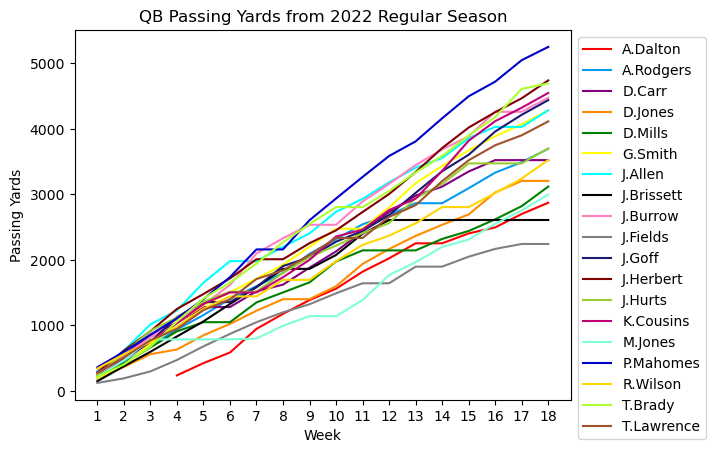

In [21]:
plt.figure(figsize=(12,10))
colors = [
    'red','#069AF3','purple','darkorange','green','yellow','aqua',
    'black','#FF81C0','gray','midnightblue','maroon','yellowgreen', '#C20078',
    'aquamarine','mediumblue','gold','greenyellow','sienna'
    
]

passing_yards.plot(color=colors, xlabel='Week', ylabel='Passing Yards', title='QB Passing Yards from 2022 Regular Season', xticks=range(1,19))
plt.legend(bbox_to_anchor=(1, 1))

<p> Next, we move on the the RB data and repeat the process. We add a 'cumsum rushing yards' column in the dataframe to keep track of yards ran for each running back in the 2022 season. </p>

In [7]:
RB_weekly_data = RB_weekly_data.sort_values(by=['week','player_display_name'])
RB_weekly_data['cumsum_rushing_yards'] = RB_weekly_data.groupby(['player_display_name'])[['rushing_yards']].cumsum()
RB_weekly_data.head()

,player_id,player_name,player_display_name,position,position_group,headshot_url,recent_team,season,week,season_type,...,receiving_epa,receiving_2pt_conversions,racr,target_share,air_yards_share,wopr,special_teams_tds,fantasy_points,fantasy_points_ppr,cumsum_rushing_yards
3752,00-0036265,A.Dillon,A.J. Dillon,RB,RB,https://static.www.nfl.com/image/private/f_aut...,GB,2022,1,REG,...,2.031833,0,-11.50,0.171429,-0.019048,0.243810,0.0,15.1,20.1,45.0
1326,00-0033293,A.Jones,Aaron Jones,RB,RB,https://static.www.nfl.com/image/private/f_aut...,GB,2022,1,REG,...,-0.272080,0,-6.75,0.142857,-0.019048,0.200952,0.0,7.6,10.6,49.0
2737,00-0034972,A.Mattison,Alexander Mattison,RB,RB,https://static.www.nfl.com/image/private/f_aut...,MIN,2022,1,REG,...,NaN,0,NaN,NaN,NaN,NaN,0.0,3.6,3.6,36.0
1832,00-0033906,A.Kamara,Alvin Kamara,RB,RB,https://static.www.nfl.com/image/private/f_aut...,NO,2022,1,REG,...,-2.250404,0,7.00,0.125000,0.003356,0.189849,0.0,4.6,7.6,39.0
780,00-0032104,A.Abdullah,Ameer Abdullah,RB,RB,https://static.www.nfl.com/image/private/f_aut...,LV,2022,1,REG,...,-0.778983,0,0.00,0.028571,0.051205,0.078701,0.0,0.0,0.0,0.0


<p> Filter the dataframe to only include running backs that has played at least 15 out of 18 weeks of the regular season. Since there are quite a bit of RBs that fit that condition I have split the dataframe into two so it will be easier to graph. </p>

In [8]:
rushing_yards = RB_weekly_data.set_index(['week', 'player_display_name'])['cumsum_rushing_yards'].unstack()
rushing_yards = rushing_yards.dropna(axis=1, thresh=15)
rushing_yards = rushing_yards.ffill()
rushing_yards1 = rushing_yards.iloc[:,:20]
rushing_yards2 = rushing_yards.iloc[:,20:]

Create the line chart of the running backs from the 2022 regular season that has appeared in at least 15 weeks of game play. This graph shows the first half of RBs. Each RB is denoted by a unique color.

<Figure size 1200x1000 with 0 Axes>

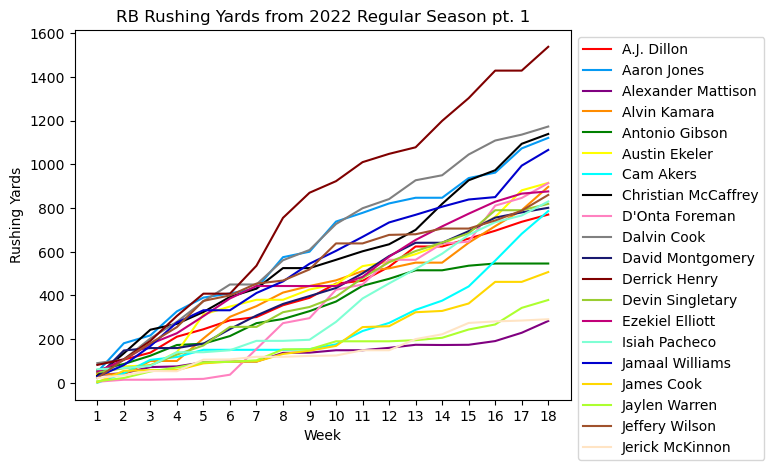

In [22]:
plt.figure(figsize=(12,10))
colors = [
    'red','#069AF3','purple','darkorange','green','yellow','aqua',
    'black','#FF81C0','gray','midnightblue','maroon','yellowgreen', '#C20078',
    'aquamarine','mediumblue','gold','greenyellow','sienna','bisque'
    
]

rushing_yards1.plot(color=colors, xlabel='Week', ylabel='Rushing Yards', title='RB Rushing Yards from 2022 Regular Season pt. 1', xticks=range(1,19))
plt.legend(bbox_to_anchor=(1, 1))

Second half of RBs are in the chart below

<Figure size 1200x1000 with 0 Axes>

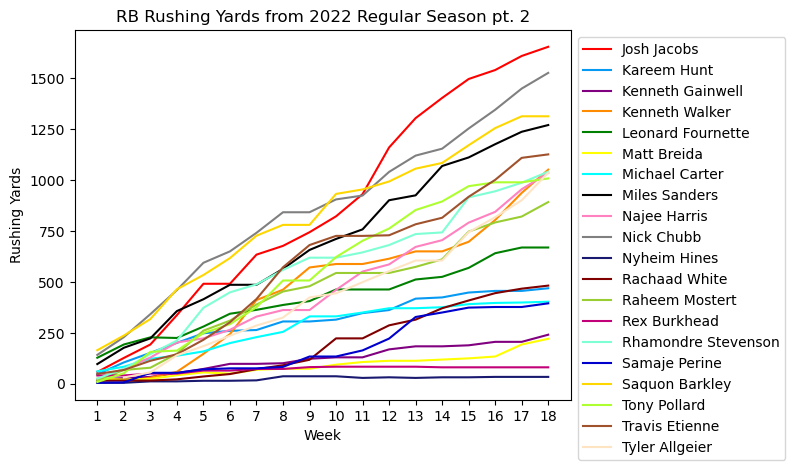

In [23]:
plt.figure(figsize=(12,10))
colors = ['red','#069AF3','purple','darkorange','green','yellow','aqua',
    'black','#FF81C0','gray','midnightblue','maroon','yellowgreen', '#C20078',
    'aquamarine','mediumblue','gold','greenyellow','sienna','bisque'
]
rushing_yards2.plot(color=colors, xlabel='Week', ylabel='Rushing Yards', title='RB Rushing Yards from 2022 Regular Season pt. 2', xticks=range(1,19))
plt.legend(bbox_to_anchor=(1, 1))

Lastly, we work on the dataframe for the wide recievers. Wide recievers have a unique situation where they have 'recieving yards' and they can continue to accumulate yards after the catch labeled as 'yards after catch'. There for we will add a column for 'cumsum recieving yards' and 'cumsum total yards' which will denote the summation of recieving yards and the yards after the catch. 

In [26]:
WR_weekly_data = WR_weekly_data.sort_values(by=['week','player_display_name'])
WR_weekly_data['cumsum_receiving_yards'] = WR_weekly_data.groupby(['player_display_name'])[['receiving_yards']].cumsum()
WR_weekly_data['total_yards'] = WR_weekly_data['receiving_yards'] + WR_weekly_data['receiving_yards_after_catch']
WR_weekly_data['cumsum_total_yards'] =  WR_weekly_data.groupby(['player_display_name'])[['total_yards']].cumsum()
WR_weekly_data.head()

,player_id,player_name,player_display_name,position,position_group,headshot_url,recent_team,season,week,season_type,...,racr,target_share,air_yards_share,wopr,special_teams_tds,fantasy_points,fantasy_points_ppr,cumsum_receiving_yards,total_yards,cumsum_total_yards
3282,00-0035676,A.Brown,A.J. Brown,WR,WR,https://static.www.nfl.com/image/private/f_aut...,PHI,2022,1,REG,...,1.648936,0.448276,0.728682,1.182491,0.0,15.5,25.5,155.0,218.0,218.0
88,00-0027942,A.Green,A.J. Green,WR,WR,https://static.www.nfl.com/image/private/f_aut...,ARI,2022,1,REG,...,0.309524,0.111111,0.157895,0.277193,0.0,1.3,3.3,13.0,13.0,13.0
261,00-0030035,A.Thielen,Adam Thielen,WR,WR,https://static.www.nfl.com/image/private/f_aut...,MIN,2022,1,REG,...,1.333333,0.129032,0.166667,0.310215,0.0,3.6,6.6,36.0,48.0,48.0
5285,00-0037664,A.Pierce,Alec Pierce,WR,WR,https://static.www.nfl.com/image/private/f_aut...,IND,2022,1,REG,...,0.000000,0.040816,0.047022,0.094140,0.0,0.0,0.0,0.0,0.0,0.0
575,00-0031428,A.Robinson,Allen Robinson,WR,WR,https://static.www.nfl.com/image/private/f_aut...,LA,2022,1,REG,...,0.428571,0.048780,0.117155,0.155179,0.0,1.2,2.2,12.0,12.0,12.0


Create a new dataframe 'receiving yards' to see the yards accumulated from week 1 to week 18 for each wide receiver. Same cleaning process applied for filling missing data and only using WRs that have played at least 15 of 18 weeks.

In [27]:
receiving_yards = WR_weekly_data.set_index(['week', 'player_display_name'])['cumsum_receiving_yards'].unstack()
receiving_yards = receiving_yards.dropna(axis=1, thresh=15)
receiving_yards = receiving_yards.ffill()
receiving_yards.head()

player_display_name,A.J. Brown,Adam Thielen,Alec Pierce,Allen Lazard,Amari Cooper,Amon-Ra St. Brown,Brandon Aiyuk,Brandon Powell,Braxton Berrios,CeeDee Lamb,...,Quez Watkins,Robert Woods,Shi Smith,Stefon Diggs,Terry McLaurin,Trent Sherfield,Tyler Boyd,Tyler Lockett,Tyreek Hill,Zay Jones
week,,,,,,,,,,,,,,,,,,,,,
1,155.0,36.0,0.0,NaN,17.0,64.0,40.0,10.0,37.0,29.0,...,NaN,13.0,12.0,122.0,58.0,8.0,33.0,28.0,94.0,65.0
2,224.0,88.0,0.0,13.0,118.0,180.0,103.0,16.0,37.0,104.0,...,69.0,52.0,14.0,270.0,133.0,17.0,50.0,135.0,284.0,88.0
3,309.0,149.0,61.0,58.0,219.0,253.0,142.0,43.0,37.0,191.0,...,69.0,137.0,36.0,344.0,235.0,22.0,155.0,211.0,317.0,173.0
4,404.0,221.0,141.0,174.0,228.0,253.0,179.0,43.0,43.0,288.0,...,69.0,167.0,36.0,406.0,250.0,77.0,202.0,302.0,477.0,173.0
5,436.0,248.0,222.0,209.0,304.0,271.0,237.0,43.0,42.0,341.0,...,88.0,204.0,105.0,508.0,326.0,82.0,234.0,406.0,524.0,185.0


Split the dataframe into 3 to limit that amount of players for each graph

In [28]:
receiving_yards1 = receiving_yards.iloc[:,:20]
receiving_yards2 = receiving_yards.iloc[:,20:40]
receiving_yards3 = receiving_yards.iloc[:,40:]

Create line chart for the first half of WR. This chart only contains the receiving yards for each WR. 

<Figure size 1200x1000 with 0 Axes>

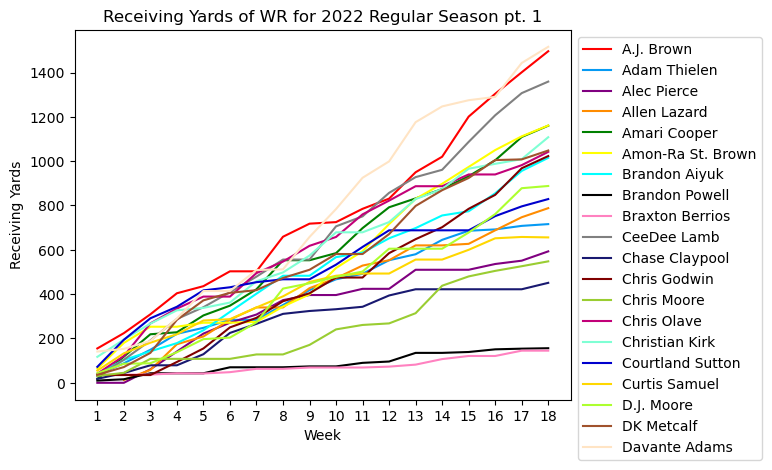

In [30]:
plt.figure(figsize=(12,10))
colors = ['red','#069AF3','purple','darkorange','green','yellow','aqua',
    'black','#FF81C0','gray','midnightblue','maroon','yellowgreen', '#C20078',
    'aquamarine','mediumblue','gold','greenyellow','sienna','bisque'
]
receiving_yards1.plot(color=colors, xlabel='Week', ylabel='Receiving Yards', title='Receiving Yards of WR for 2022 Regular Season pt. 1', xticks=range(1,19))
plt.legend(bbox_to_anchor=(1, 1))

Chart for the second half of WR receiving yards

<Figure size 1200x1000 with 0 Axes>

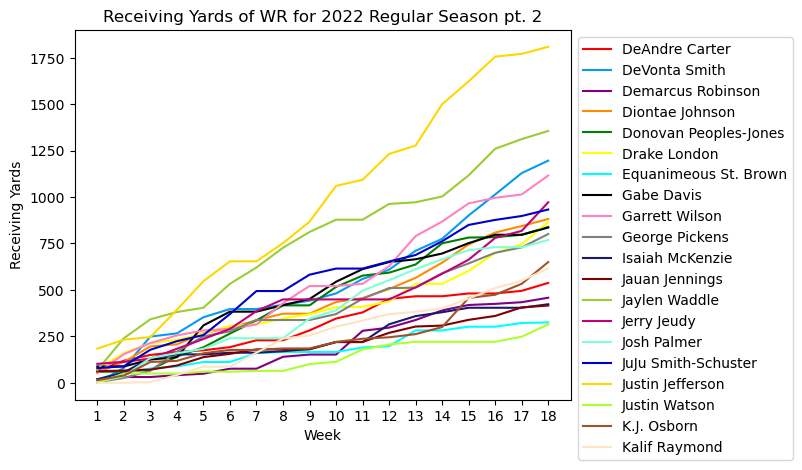

In [31]:
plt.figure(figsize=(12,10))
colors = ['red','#069AF3','purple','darkorange','green','yellow','aqua',
    'black','#FF81C0','gray','midnightblue','maroon','yellowgreen', '#C20078',
    'aquamarine','mediumblue','gold','greenyellow','sienna','bisque'
]
receiving_yards2.plot(color=colors, xlabel='Week', ylabel='Receiving Yards', title='Receiving Yards of WR for 2022 Regular Season pt. 2', xticks=range(1,19))
plt.legend(bbox_to_anchor=(1, 1))

Chart for the remaining WR data

<Figure size 1200x1000 with 0 Axes>

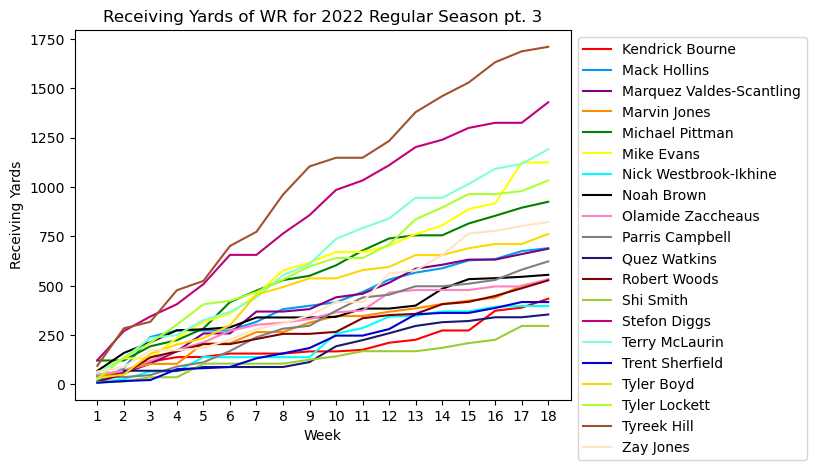

In [32]:
plt.figure(figsize=(12,10))
colors = ['red','#069AF3','purple','darkorange','green','yellow','aqua',
    'black','#FF81C0','gray','midnightblue','maroon','yellowgreen', '#C20078',
    'aquamarine','mediumblue','gold','greenyellow','sienna','bisque'
]
receiving_yards3.plot(color=colors, xlabel='Week', ylabel='Receiving Yards', title='Receiving Yards of WR for 2022 Regular Season pt. 3', xticks=range(1,19))
plt.legend(bbox_to_anchor=(1, 1))

Create a dataframe for WR receiving yard plus the additional yards after the catch. Same filtering and data cleaning process applies.

In [16]:
total_receiving_yards = WR_weekly_data.set_index(['week', 'player_display_name'])['cumsum_total_yards'].unstack()
total_receiving_yards = total_receiving_yards.dropna(axis=1, thresh=15)
total_receiving_yards = total_receiving_yards.ffill()
total_receiving_yards.head()

player_display_name,A.J. Brown,Adam Thielen,Alec Pierce,Allen Lazard,Amari Cooper,Amon-Ra St. Brown,Brandon Aiyuk,Brandon Powell,Braxton Berrios,CeeDee Lamb,...,Quez Watkins,Robert Woods,Shi Smith,Stefon Diggs,Terry McLaurin,Trent Sherfield,Tyler Boyd,Tyler Lockett,Tyreek Hill,Zay Jones
week,,,,,,,,,,,,,,,,,,,,,
1,218.0,48.0,0.0,NaN,23.0,95.0,54.0,17.0,62.0,38.0,...,NaN,13.0,24.0,149.0,78.0,8.0,34.0,33.0,134.0,86.0
2,321.0,101.0,0.0,13.0,155.0,267.0,144.0,23.0,62.0,138.0,...,72.0,65.0,30.0,327.0,178.0,26.0,54.0,162.0,388.0,118.0
3,432.0,177.0,70.0,67.0,285.0,394.0,196.0,86.0,62.0,255.0,...,72.0,177.0,58.0,437.0,292.0,34.0,227.0,241.0,422.0,252.0
4,561.0,260.0,158.0,226.0,299.0,394.0,266.0,86.0,76.0,387.0,...,72.0,221.0,58.0,510.0,323.0,92.0,285.0,343.0,650.0,252.0
5,597.0,295.0,252.0,274.0,379.0,420.0,349.0,86.0,76.0,471.0,...,112.0,273.0,144.0,680.0,432.0,97.0,338.0,452.0,712.0,281.0


Seperate the dataframe into 3 seperate ones for graphing purposes

In [17]:
total_receiving_yards1 = total_receiving_yards.iloc[:,:20]
total_receiving_yards2 = total_receiving_yards.iloc[:,20:40]
total_receiving_yards3 = total_receiving_yards.iloc[:,40:]

Chart #1

<Figure size 1200x1000 with 0 Axes>

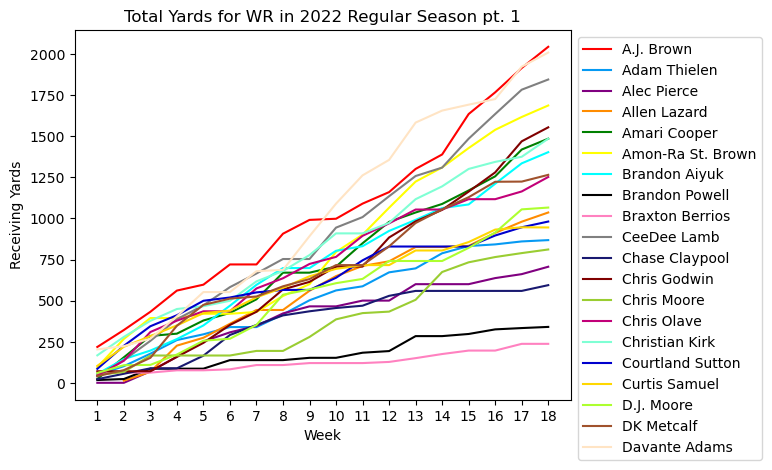

In [33]:
plt.figure(figsize=(12,10))
colors = ['red','#069AF3','purple','darkorange','green','yellow','aqua',
    'black','#FF81C0','gray','midnightblue','maroon','yellowgreen', '#C20078',
    'aquamarine','mediumblue','gold','greenyellow','sienna','bisque'
]
total_receiving_yards1.plot(color=colors, xlabel='Week', ylabel='Receiving Yards', title='Total Yards for WR in 2022 Regular Season pt. 1', xticks=range(1,19))
plt.legend(bbox_to_anchor=(1, 1))

Chart #2

<Figure size 1200x1000 with 0 Axes>

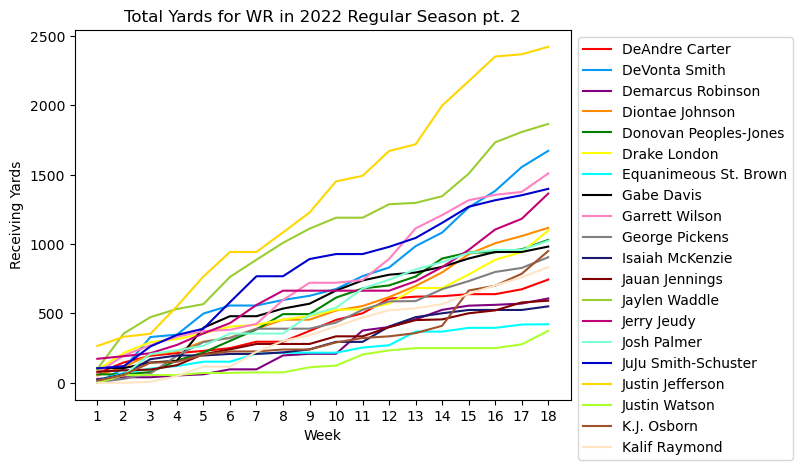

In [34]:
plt.figure(figsize=(12,10))
colors = ['red','#069AF3','purple','darkorange','green','yellow','aqua',
    'black','#FF81C0','gray','midnightblue','maroon','yellowgreen', '#C20078',
    'aquamarine','mediumblue','gold','greenyellow','sienna','bisque'
]
total_receiving_yards2.plot(color=colors, xlabel='Week', ylabel='Receiving Yards', title='Total Yards for WR in 2022 Regular Season pt. 2', xticks=range(1,19))
plt.legend(bbox_to_anchor=(1, 1))

Chart #3

<Figure size 1200x1000 with 0 Axes>

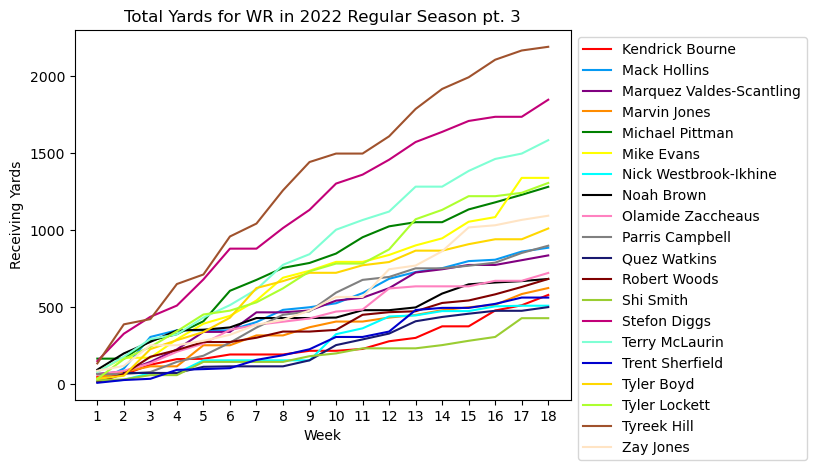

In [35]:
plt.figure(figsize=(12,10))
colors = ['red','#069AF3','purple','darkorange','green','yellow','aqua',
    'black','#FF81C0','gray','midnightblue','maroon','yellowgreen', '#C20078',
    'aquamarine','mediumblue','gold','greenyellow','sienna','bisque'
]
total_receiving_yards3.plot(color=colors, xlabel='Week', ylabel='Receiving Yards', title='Total Yards for WR in 2022 Regular Season pt. 3', xticks=range(1,19))
plt.legend(bbox_to_anchor=(1, 1))